In [22]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [9]:
df = pd.read_csv('fake_news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# Cleaning

In [10]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [12]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

# Charts

### Class Distribution

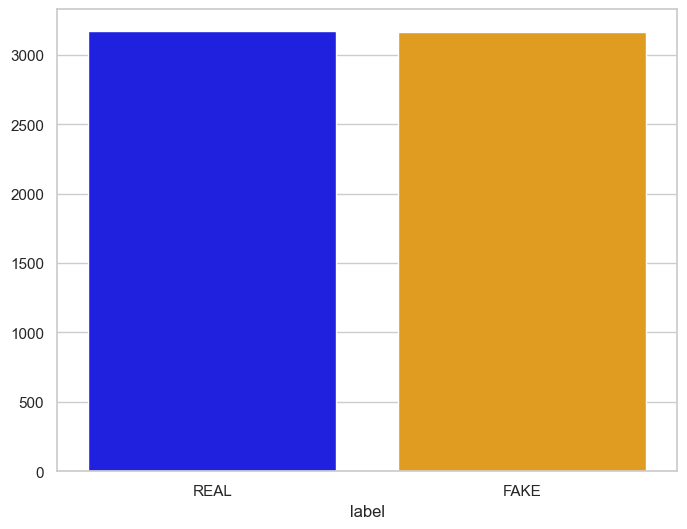

In [34]:
class_counts = df['label'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette=['blue', 'orange'])
plt.show()

### Text and Title Length

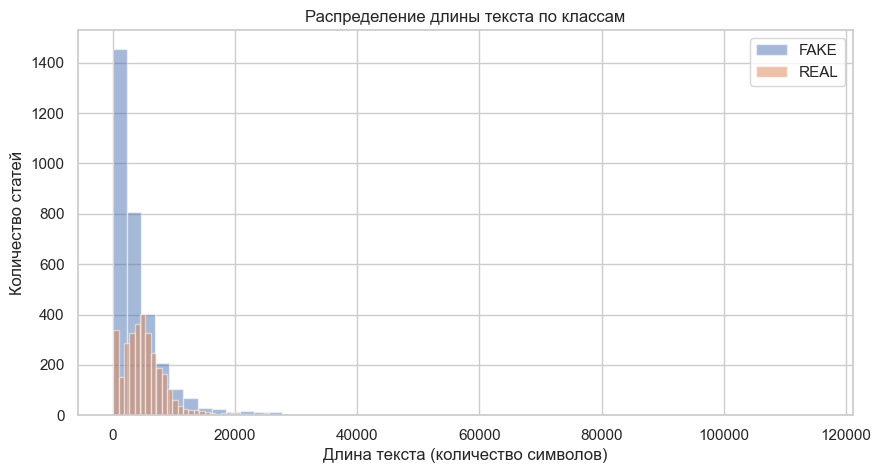

In [36]:
plt.figure(figsize=(10,5))
plt.hist(df[df['label']=='FAKE']['text'].apply(len), bins=50, alpha=0.5, label='FAKE')
plt.hist(df[df['label']=='REAL']['text'].apply(len), bins=50, alpha=0.5, label='REAL')
plt.xlabel("Длина текста (количество символов)")
plt.ylabel("Количество статей")
plt.title("Распределение длины текста по классам")
plt.legend()
plt.show()

# Tf-idf

# Model

In [18]:
X = df.drop(columns='label')
y = df['label']

In [19]:
X.head()

,title,text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...


In [20]:
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)